In [1]:
import SPOCK.long_term_scheduler as SPOCKLT
import SPOCK.short_term_scheduler as SPOCKST
import SPOCK.plots_scheduler as SPOCKplot
from astropy.time import Time

# LONG TERM SCHEDULER

In [3]:
# ---------------------- LONG TERM SCHEDULER ---------------------
schedule = SPOCKLT.schedules()
# 1 for SSO , 2 for SNO and 3 for Saint-Ex
obs = 1
schedule.load_parameters('./input.csv',obs)
#schedule.make_schedule(Altitude_constraint = 25, Moon_constraint = 30)


In [11]:
display(schedule.target_table_spc[schedule.idx_first_target])
display(schedule.target_table_spc[schedule.idx_second_target])


Sp_ID,2MASS_ID,Gaia_ID,Filter,texp_spc,nb_hours_surved,nb_hours_threshold,RA,DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_T1b,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,prog,Note
str11,str16,int64,str3,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str16,int64,str19
Sp0544-2433,05441150-2433018,2915187925218983296,I+z,63,103.55501231146852,100,86.0480911,-24.550697699999997,16.94,14.85,12.53,11.87,11.46,20.624,0.0545,0.09,0.02,0.11,0.01,2605.0,105.0,7.5,1.1,12.54,4.4,1.83,Callisto,3,output_list


Sp_ID,2MASS_ID,Gaia_ID,Filter,texp_spc,nb_hours_surved,nb_hours_threshold,RA,DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_T1b,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,prog,Note
str11,str16,int64,str3,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str16,int64,str19
Sp0248-1651,02484100-1651216,5156623295621846016,I+z,70,71.43367897813519,100,42.1708225,-16.8561424,16.87,14.7,12.55,11.87,11.42,22.4462,0.0742,0.09,0.02,0.11,0.01,2682.0,105.0,7.0,1.1,12.59,4.41,1.76,Callisto,3,output_list


In [12]:
SPOCKLT.save_schedule('./input.csv',obs,save=True,over_write=True)

INFO : "./night_blocks_propositions/night_blocks_Callisto_2019-12-04.txt" has been over-written to "./DATABASE/Callisto/"
INFO : "./night_blocks_propositions/night_blocks_Callisto_2019-12-04.txt" has been copied to "./DATABASE/Callisto/Archive_night_blocks/"


In [13]:
day = Time('2019-12-04 15:00:00.000')
SPOCKLT.make_np(day,1,schedule.telescope)
SPOCKLT.upload_plans(day, nb_days=1,telescope = schedule.telescope)

2019-12-04 15:00:00.000 1 Callisto
Callisto
./DATABASE/Callisto/Plans_by_date/2019-12-04
   target       start time (UTC)    ...      configuration     
----------- ----------------------- ... -----------------------
Sp0248-1651 2019-12-05 00:15:40.020 ... {'filt=I+z', 'texp=70'}
Sp0544-2433 2019-12-05 04:28:40.030 ... {'texp=63', 'filt=I+z'}
avant : I+z
apres : I+z 70
avant : I+z
apres : I+z 63
./DATABASE/Callisto/Plans_by_date
0 2
Sp0248-1651
idx_taret [144]
2h48m40.997400000001676s -16d51m22.112639999998294s
-16.8561424 -0.29419518406501904
1 2
Sp0544-2433
[310]
5h44m11.541864000001425s -24d33m2.5117199999894524s
-24.550697699999997 -0.42849050852679904
str(filt) {0: 'I+z', 1: 'I+z'}
CALLISTO
-----> 2019-12-04 uploaded on the HUB for Callisto
speculoos@appcs.ra.phy.cam.ac.uk:/appct/data/SPECULOOSPipeline/Callisto/schedule
./DATABASE/Callisto/Plans_by_date/
./DATABASE/Callisto/Archive_night_blocks/


# SHORT TERM SCHEDULER

In [17]:
# ---------------------- SHORT TERM SCHEDULER ---------------------
obs = 2
schedule = SPOCKST.schedules()
schedule.load_parameters('input_short_term.csv',obs)

if schedule.use == 'follow_up':
    schedule.transit_follow_up('target_dynamical_follow_up.txt')
if schedule.use == 'special_start_end':
    input_name = 'Sp0755-2404'
    schedule.special_target_with_start_end(input_name)
if schedule.use == 'special':
    input_name = 'Sp0000-1245'
    schedule.special_target(input_name)
if schedule.use == 'monitoring':
    input_name = 'Sp0755-2404'
    schedule.monitoring(input_name,5,61)

schedule.make_scheduled_table()
schedule.planification()
schedule.make_night_block()
SPOCKST.make_np(day=schedule.day_of_night,nb_jours=1,telescope=schedule.telescope)


target_transit ['2019-12-03 19:26:33.176']
start_transit 2019-12-03 18:13:23.133
end_transit 2019-12-03 20:39:45.219



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [eScheduler.utils]


block <eScheduler.spe_schedule.ObservingBlock (Trappist-1b, unscheduled) at 0x1286f05f8>
2019-12-03 18:13:23.133 2019-12-03 20:39:45.219
target_transit ['2019-12-05 13:42:42.513']
pas de transit ce jour
target_transit ['2019-12-06 18:43:58.520']



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [eScheduler.utils]


start_transit 2019-12-06 16:38:32.577
end_transit 2019-12-06 20:49:26.463
block <eScheduler.spe_schedule.ObservingBlock (Trappist-1d, unscheduled) at 0x11c5bcef0>
2019-12-06 16:38:32.577 2019-12-06 20:49:26.463
target_transit ['2019-12-07 21:43:16.616']
start_transit 2019-12-07 19:46:58.585
end_transit 2019-12-07 23:39:36.647



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [eScheduler.utils]


block <eScheduler.spe_schedule.ObservingBlock (Trappist-1e, unscheduled) at 0x127f5c550>
2019-12-07 19:46:58.585 2019-12-07 23:39:36.647
target_transit ['2019-12-04 14:13:39.080']
pas de transit ce jour
target_transit ['2019-12-09 04:06:39.493']
pas de transit ce jour
target_transit ['2019-12-08 16:01:33.118']
pas de transit ce jour
/Users/elsaducrot/Documents/GitHub/Scheduler_global/Python/Artemis/night_blocks_Artemis_2019-12-03.txt



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [eScheduler.utils]


SystemExit: WARNING : No block to insert !

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3299: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



# PLOT SCHEDULER


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [eScheduler.utils]
/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



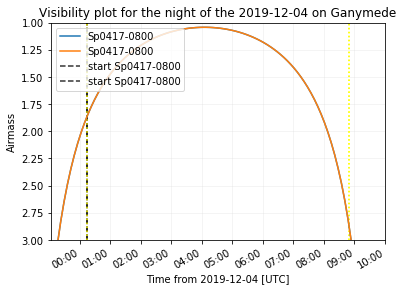

In [5]:
# ---------------------- PLOT SCHEDULER ---------------------
import matplotlib.pyplot as plt
day = Time('2019-12-04 15:00:00.000')
SPOCKplot.airmass_plot_saved('SSO','Ganymede',day)
SPOCKplot.airmass_plot_proposition('SSO','Ganymede',day)
#SPOCKplot.airmass_altitude_plot_saved('SSO','Io',day)
#SPOCKplot.airmass_altitude_plot_proposition('SSO','Io',day)
#SPOCKplot.gantt_chart(day,day+10,['Artemis'])
#SPOCKplot.gantt_chart_all(schedule.target_list)
plt.savefig('visibiblity_plot_example.pdf')

In [15]:
SPOCKplot.gantt_chart_all(schedule.target_list)

In [4]:
SPOCKplot.gantt_chart(day-1,day+1,['Artemis'])